In [1]:
import pandas as pd
from datetime import datetime
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [17]:
import pandas_profiling

In [2]:
matplotlib.rcParams['figure.figsize'] =  [12.0, 8.0]

In [ ]:
'''

2. вариант 1) Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.
2. вариант2) COVID19 EDA для любой страны кроме Китая с длиной ряда больше 50 дней ( можно обновить данные по ссылке).

3. вариант 1) Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам . Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent. (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )
3. вариант 2) Сделайте ресемплинг COVID19 на интервалы 3 дня, неделя, 2 недели.Постройте график изменения среднего по выборке и среднего отклонения по выборке на группах для интервалах 3 дня, неделя, 2 недели (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )

4. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

'''

In [ ]:
'''
SNoSerial Number
ObservationDateObservation date in mm/dd/yyyy
Province/StateProvince or State
Country/RegionCountry or region
Last UpdateLast update date time in UTC
ConfirmedCumulative number of confirmed cases
'''

## Подготовка данных 1 (EDA)

In [3]:
df_all = pd.read_csv('covid_19_data.csv')
df_all.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
df= df_all[['ObservationDate', 'Country/Region', 'Last Update', 'Confirmed', 'Deaths', 'Recovered']].loc[df_all['Country/Region']=='Russia']

In [5]:
df.columns = ['date', 'country', 'update', 'confirmed', 'deaths', 'recovered']

In [6]:
df.head()

,date,country,update,confirmed,deaths,recovered
482,01/31/2020,Russia,1/31/2020 23:59,2.0,0.0,0.0
540,02/01/2020,Russia,1/31/2020 16:13,2.0,0.0,0.0
610,02/02/2020,Russia,2020-01-31T16:13:45,2.0,0.0,0.0
677,02/03/2020,Russia,2020-01-31T16:13:45,2.0,0.0,0.0
745,02/04/2020,Russia,2020-01-31T16:13:45,2.0,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 482 to 12064
Data columns (total 6 columns):
date         66 non-null object
country      66 non-null object
update       66 non-null object
confirmed    66 non-null float64
deaths       66 non-null float64
recovered    66 non-null float64
dtypes: float64(3), object(3)
memory usage: 3.6+ KB


In [ ]:
#переведем даты в формат дат

In [8]:
df[["date", "update"]] = df[["date", "update"]].apply(pd.to_datetime)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 482 to 12064
Data columns (total 6 columns):
date         66 non-null datetime64[ns]
country      66 non-null object
update       66 non-null datetime64[ns]
confirmed    66 non-null float64
deaths       66 non-null float64
recovered    66 non-null float64
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 3.6+ KB


In [10]:
df.describe()

,confirmed,deaths,recovered
count,66.00000,66.000000,66.000000
mean,498.00000,3.484848,30.287879
std,1166.11241,9.762160,76.285650
min,2.00000,0.000000,0.000000
25%,2.00000,0.000000,2.000000
50%,3.00000,0.000000,2.000000
75%,239.50000,1.000000,9.000000
max,5389.00000,45.000000,355.000000


In [11]:
# проверим пропуски

In [12]:
df.isnull().sum()

date         0
country      0
update       0
confirmed    0
deaths       0
recovered    0
dtype: int64

## Визуализация данных

In [13]:
df_covid = df.groupby(['date'])['confirmed', 'deaths', 'recovered'].sum()

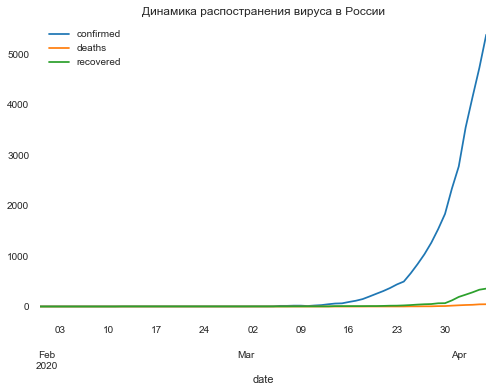

In [32]:
df_covid.plot()
plt.title('Динамика распостранения вируса в России')
plt.show()

In [19]:
#pandas_profiling.ProfileReport(df)

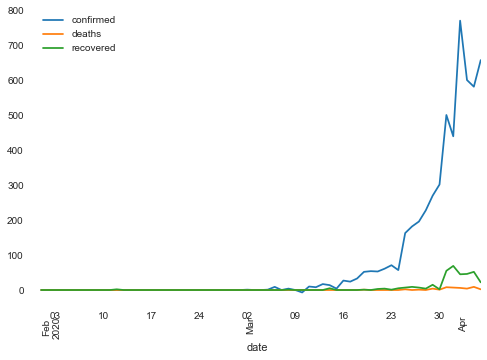

In [20]:
df_covid.diff(1).plot()
plt.xticks(label = df_covid.index.get_level_values('date'), rotation=90)
plt.show()

### Оценим динамику разности на фоне введения нерабочей недели

In [21]:
vacation_start = ['2020-03-28']
data_v = pd.to_datetime(vacation_start)

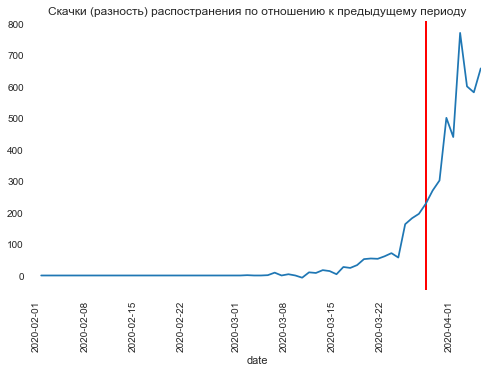

In [22]:
plt.axvline(x=data_v, linewidth=2, color='r')
df_covid.confirmed.diff(1).plot()
plt.title('Скачки (разность) распостранения по отношению к предыдущему периоду')
plt.xticks(label = df_covid.index.get_level_values('date'), rotation=90)
plt.show()

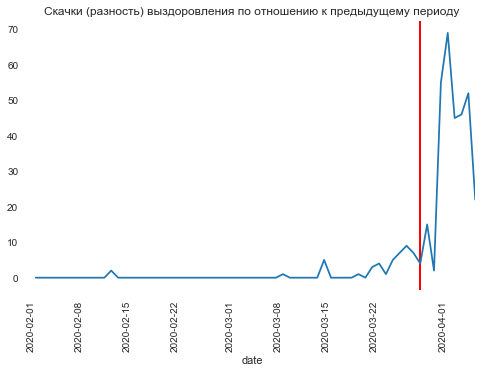

In [23]:
plt.axvline(x=data_v, linewidth=2, color='r')
df_covid.recovered.diff(1).plot()
plt.title('Скачки (разность) выздоровления по отношению к предыдущему периоду')
plt.xticks(label = df_covid.index.get_level_values('date'), rotation=90)
plt.show()

## Оценим интервал в 3 дня

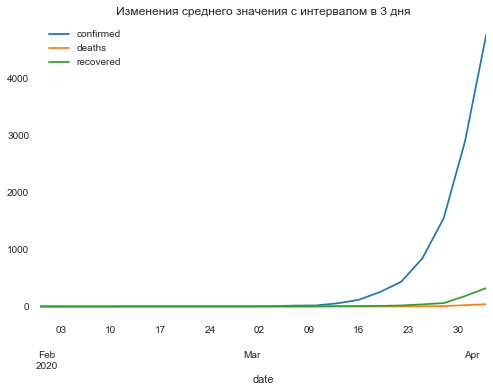

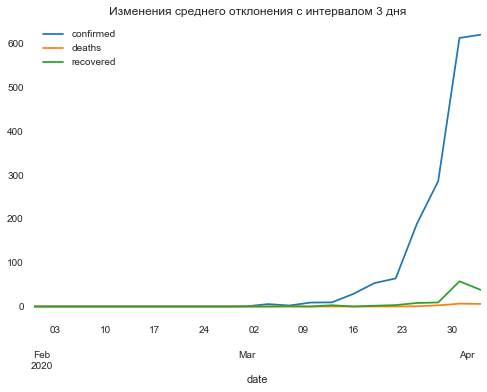

In [31]:
#plt.axvline(x=data_v, linewidth=2, color='r')
df_covid.resample("3D").mean().plot()
plt.title('Изменения среднего значения с интервалом в 3 дня' )
#plt.axvline(x=data_v, linewidth=2, color='r')
df_covid.resample("3D").std().plot()
plt.title('Изменения среднего отклонения с интервалом 3 дня')

plt.show()

## Оценим интервал в неделю

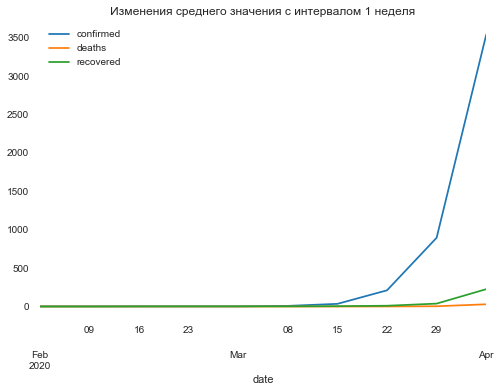

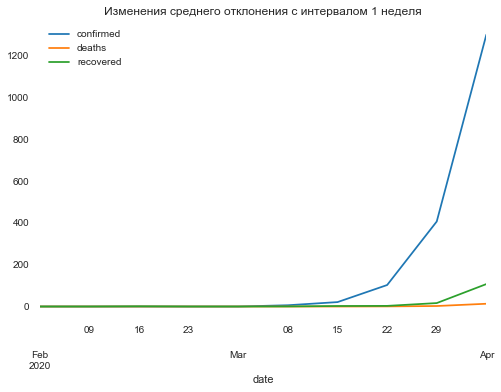

In [26]:
df_covid.resample("W").mean().plot()
plt.title('Изменения среднего значения с интервалом 1 неделя')

df_covid.resample("W").std().plot()
plt.title('Изменения среднего отклонения с интервалом 1 неделя')

plt.show()

In [61]:
## Оценим интервал в 2 недели

In [27]:
df_covid.resample("2W").mean()

,confirmed,deaths,recovered
date,,,
2020-02-02,2.000000,0.000000,0.000000
2020-02-16,2.000000,0.000000,0.714286
2020-03-01,2.000000,0.000000,2.000000
2020-03-15,21.285714,0.000000,3.285714
2020-03-29,552.928571,2.000000,23.857143
2020-04-12,3538.142857,28.857143,225.857143


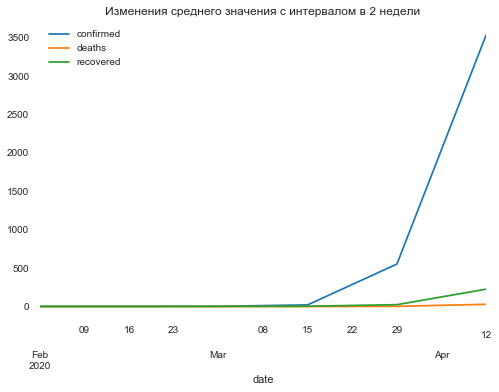

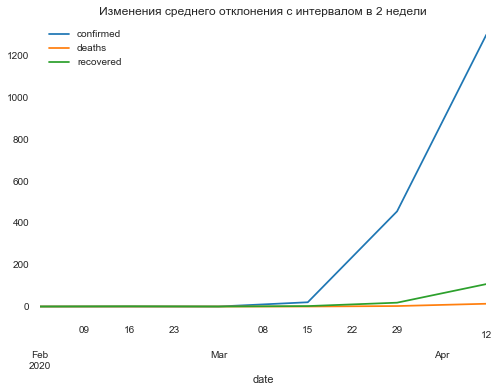

In [28]:
df_covid.resample("2W").mean().plot()
plt.title('Изменения среднего значения с интервалом в 2 недели')


df_covid.resample("2W").std().plot()
plt.title('Изменения среднего отклонения с интервалом в 2 недели')

plt.show()

In [ ]:
#https://pypi.org/project/holidays/
!pip install holidays
import holidays

Резюме:

1. несмотря на восходящие тренд, наметились позитивные тренды в разности восстановления
2. очевидно, что анализировать данные невозможно без привязким к ключевым событиям, поэтому была введена дата объявления нерабочей недели, но выводы пока еще делать рано 
3. по сравнению с анализом за 2 недели, неделю и 3 дня, наиболее полезныей выбор это интервал в 3 дня, где мы видим, как отличается график среднего отклонения